In [234]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [235]:
df_bond_ratings=pd.read_csv('bond_ratings.csv')
df_bond_ratings

,bb_rating,us_govt_bond_rating,below_b_rating,others_rating,maturity_bond,b_rating,tag,a_rating,aaa_rating,aa_rating,bbb_rating,duration_bond
0,0.00,0.0,0.00,0.0,NaN,0.00,67922,0.00,0.0,0.00,0.00,NaN
1,0.00,0.0,0.00,0.0,NaN,0.00,134783,0.00,0.0,0.00,0.00,NaN
2,0.00,0.0,0.00,0.0,NaN,0.00,61271,0.00,0.0,0.00,0.00,NaN
3,0.00,0.0,0.00,0.0,NaN,0.00,64412,0.00,0.0,0.00,0.00,NaN
4,0.00,0.0,0.00,0.0,NaN,0.00,184058,0.00,0.0,0.00,0.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
24995,0.00,0.0,0.00,0.0,NaN,0.00,142001,0.00,0.0,0.00,0.00,NaN
24996,0.00,0.0,0.00,0.0,NaN,0.00,40598,0.00,0.0,0.00,0.00,NaN
24997,24.65,0.0,2.81,4.0,6.85,40.22,202562,3.42,11.7,0.42,12.78,2.74
24998,0.00,0.0,0.00,0.0,NaN,0.00,144818,0.00,0.0,0.00,0.00,NaN


# EDA 

In [236]:
#shape of the data
df_bond_ratings.shape

(25000, 12)

In [237]:
df_bond_ratings.dtypes

bb_rating              float64
us_govt_bond_rating    float64
below_b_rating         float64
others_rating          float64
maturity_bond          float64
b_rating               float64
tag                      int64
a_rating               float64
aaa_rating             float64
aa_rating              float64
bbb_rating             float64
duration_bond          float64
dtype: object

In [238]:
#Describe the data
df_bond_ratings.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
bb_rating,24886.0,3.473804,8.299747,0.00,0.00,0.00,2.450,80.47
us_govt_bond_rating,24886.0,0.000000,0.000000,0.00,0.00,0.00,0.000,0.00
below_b_rating,24886.0,0.827525,2.700019,-0.02,0.00,0.00,0.100,42.30
others_rating,24886.0,1.666769,6.885158,-68.21,0.00,0.00,0.330,100.00
maturity_bond,8093.0,7.765444,4.148558,0.00,5.46,7.29,8.920,29.30
b_rating,24886.0,3.234399,9.197164,-0.12,0.00,0.00,0.710,80.68
tag,25000.0,139878.934640,65731.287074,26000.00,83021.75,139881.50,196759.250,253763.00
a_rating,24886.0,5.054436,9.261811,0.00,0.00,0.00,8.340,72.87
aaa_rating,24886.0,14.558310,25.636838,-3.15,0.00,0.00,18.955,118.65
aa_rating,24886.0,4.209073,11.164511,-0.19,0.00,0.00,3.010,90.22


In [239]:
(df_bond_ratings == 0).astype(float).sum(axis=0)

bb_rating              16658.0
us_govt_bond_rating    24886.0
below_b_rating         18160.0
others_rating          16602.0
maturity_bond             15.0
b_rating               17727.0
tag                        0.0
a_rating               16262.0
aaa_rating             15780.0
aa_rating              16499.0
bbb_rating             15797.0
duration_bond              0.0
dtype: float64

In [240]:
#perecentage of zero in a colum
def percentage_zero(df):
    per=[]
    for i in range(0,df.shape[1]):
        test=(df == 0).astype(float).sum(axis=0).iloc[i]/df.shape[0]*100
        per.append(test)
        
    return dict(zip(df.columns, per))
            
        

In [241]:
D=percentage_zero(df_bond_ratings)
D

{'bb_rating': 66.632,
 'us_govt_bond_rating': 99.544,
 'below_b_rating': 72.64,
 'others_rating': 66.408,
 'maturity_bond': 0.06,
 'b_rating': 70.908,
 'tag': 0.0,
 'a_rating': 65.048,
 'aaa_rating': 63.12,
 'aa_rating': 65.996,
 'bbb_rating': 63.188,
 'duration_bond': 0.0}

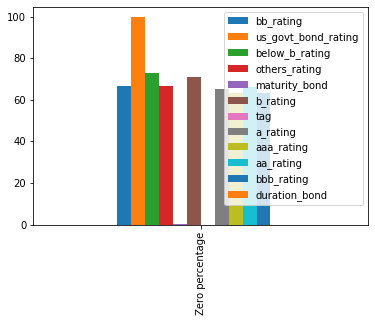

In [242]:
pd.DataFrame(D, index=['Zero percentage']).plot(kind='bar')

In [243]:
def replace_zero_with_nan(df):
    df=df.replace({0:np.nan})
    print (df.isna().sum())

In [244]:
replace_zero_with_nan(df_bond_ratings)

bb_rating              16772
us_govt_bond_rating    25000
below_b_rating         18274
others_rating          16716
maturity_bond          16922
b_rating               17841
tag                        0
a_rating               16376
aaa_rating             15894
aa_rating              16613
bbb_rating             15911
duration_bond          15126
dtype: int64


In [245]:
def percentage_nan(df):
    per=[]
    for i in range(0,df.shape[1]):
        test=(df == nan).astype(float).sum(axis=0).iloc[i]/df.shape[0]*100
        per.append(test)
        
    return dict(zip(df.columns, per))

In [246]:
#percentage_nan(df_bond_ratings)
df_bond_ratings.isnull().sum().sort_values(ascending = False)

maturity_bond          16907
duration_bond          15126
bbb_rating               114
aa_rating                114
aaa_rating               114
a_rating                 114
b_rating                 114
others_rating            114
below_b_rating           114
us_govt_bond_rating      114
bb_rating                114
tag                        0
dtype: int64

In [247]:
#Checking for any null or missing value
def check_missing_values(df):
    for item in df.columns[df.isna().any()]:
        if df[item].dtype==object:
            df[item] = df[item].fillna(df[item].mode()[0])
        else:
            df[item]=df[item].fillna((df[item].median()))
    print (df.isna().sum())
check_missing_values(df_bond_ratings)    

bb_rating              0
us_govt_bond_rating    0
below_b_rating         0
others_rating          0
maturity_bond          0
b_rating               0
tag                    0
a_rating               0
aaa_rating             0
aa_rating              0
bbb_rating             0
duration_bond          0
dtype: int64


In [248]:
#dropping a column
df_bond_ratings=df_bond_ratings.drop(['us_govt_bond_rating'],axis=1)

In [249]:
df_bond_ratings.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
bb_rating,25000.0,3.457963,8.284109,0.00,0.00,0.00,2.4200,80.47
below_b_rating,25000.0,0.823751,2.694432,-0.02,0.00,0.00,0.1000,42.30
others_rating,25000.0,1.659168,6.870359,-68.21,0.00,0.00,0.3200,100.00
maturity_bond,25000.0,7.443911,2.370742,0.00,7.29,7.29,7.2900,29.30
b_rating,25000.0,3.219650,9.178757,-0.12,0.00,0.00,0.7000,80.68
tag,25000.0,139878.934640,65731.287074,26000.00,83021.75,139881.50,196759.2500,253763.00
a_rating,25000.0,5.031388,9.246942,0.00,0.00,0.00,8.2775,72.87
aaa_rating,25000.0,14.491924,25.597117,-3.15,0.00,0.00,18.4200,118.65
aa_rating,25000.0,4.189880,11.142635,-0.19,0.00,0.00,2.9900,90.22
bbb_rating,25000.0,6.098324,10.581823,0.00,0.00,0.00,11.3400,98.00


In [250]:
#Interquntile range will suggest how disperse the data is 


In [251]:
def five_point_summary(df):
    print ('--------------First quartile---------------')
    print (df.quantile([.25, .50, .75]).iloc[0:1])
    print ('--------------Second quartile---------------')
    print (df.quantile([.25, .50, .75]).iloc[1:2])
    print ('--------------Third quartile---------------')
    print (df.quantile([.25, .50, .75]).iloc[2:3])
    print ('--------------Minimum Value---------------')
    print ('min value in (age) in data frame is \n '+str(df.min()))
    print ('--------------Max Value---------------')
    print ('max value in (age) in data frame is \n '+str(df.max()))
five_point_summary(df_bond_ratings)

--------------First quartile---------------
      bb_rating  below_b_rating  others_rating  maturity_bond  b_rating  \
0.25        0.0             0.0            0.0           7.29       0.0   

           tag  a_rating  aaa_rating  aa_rating  bbb_rating  duration_bond  
0.25  83021.75       0.0         0.0        0.0         0.0            4.8  
--------------Second quartile---------------
     bb_rating  below_b_rating  others_rating  maturity_bond  b_rating  \
0.5        0.0             0.0            0.0           7.29       0.0   

          tag  a_rating  aaa_rating  aa_rating  bbb_rating  duration_bond  
0.5  139881.5       0.0         0.0        0.0         0.0            4.8  
--------------Third quartile---------------
      bb_rating  below_b_rating  others_rating  maturity_bond  b_rating  \
0.75       2.42             0.1           0.32           7.29       0.7   

            tag  a_rating  aaa_rating  aa_rating  bbb_rating  duration_bond  
0.75  196759.25    8.2775       

In [252]:
#bivariate analysis
#df_bond_ratings=df_bond_ratings.fillna(0)
#sns.pairplot(df_bond_ratings,diag_kind='kde')
#df_bond_ratings=df_bond_ratings.drop(["us_govt_bond_rating"],axis=1)
df_bond_ratings

,bb_rating,below_b_rating,others_rating,maturity_bond,b_rating,tag,a_rating,aaa_rating,aa_rating,bbb_rating,duration_bond
0,0.00,0.00,0.0,7.29,0.00,67922,0.00,0.0,0.00,0.00,4.80
1,0.00,0.00,0.0,7.29,0.00,134783,0.00,0.0,0.00,0.00,4.80
2,0.00,0.00,0.0,7.29,0.00,61271,0.00,0.0,0.00,0.00,4.80
3,0.00,0.00,0.0,7.29,0.00,64412,0.00,0.0,0.00,0.00,4.80
4,0.00,0.00,0.0,7.29,0.00,184058,0.00,0.0,0.00,0.00,4.80
...,...,...,...,...,...,...,...,...,...,...,...
24995,0.00,0.00,0.0,7.29,0.00,142001,0.00,0.0,0.00,0.00,4.80
24996,0.00,0.00,0.0,7.29,0.00,40598,0.00,0.0,0.00,0.00,4.80
24997,24.65,2.81,4.0,6.85,40.22,202562,3.42,11.7,0.42,12.78,2.74
24998,0.00,0.00,0.0,7.29,0.00,144818,0.00,0.0,0.00,0.00,4.80


In [253]:
#sns.pairplot(df_bond_ratings,diag_kind='kde')

# fund_allocations

In [254]:
#Data for second csv
df_fund_allocations=pd.read_csv('fund_allocations.csv')
df_fund_allocations.head()

,portfolio_communication_allocation,portfolio_financial_services,portfolio_industrials_allocation,portfolio_tech_allocation,portfolio_materials_basic_allocation,portfolio_energy_allocation,portfolio_consumer_defence_allocation,portfolio_healthcare_allocation,portfolio_property_allocation,id,portfolio_utils_allocation,portfolio_cyclical_consumer_allocation
0,0.00,0.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,67922,0.00,0.00
1,0.78,9.77,9.97,35.51,2.86,0.38,5.88,14.41,2.67,134783,0.39,17.38
2,4.70,16.40,11.45,25.09,8.36,0.00,9.42,16.47,1.03,61271,0.00,7.09
3,6.53,13.80,10.91,0.16,2.22,6.79,25.73,9.00,0.00,64412,19.42,5.43
4,3.49,13.95,10.51,19.26,3.75,5.11,7.29,12.22,10.41,184058,3.07,10.95


In [255]:
#renaming colum id to tag
df_fund_allocations=df_fund_allocations.rename(columns={"id": "tag"})
df_fund_allocations.head()

,portfolio_communication_allocation,portfolio_financial_services,portfolio_industrials_allocation,portfolio_tech_allocation,portfolio_materials_basic_allocation,portfolio_energy_allocation,portfolio_consumer_defence_allocation,portfolio_healthcare_allocation,portfolio_property_allocation,tag,portfolio_utils_allocation,portfolio_cyclical_consumer_allocation
0,0.00,0.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,67922,0.00,0.00
1,0.78,9.77,9.97,35.51,2.86,0.38,5.88,14.41,2.67,134783,0.39,17.38
2,4.70,16.40,11.45,25.09,8.36,0.00,9.42,16.47,1.03,61271,0.00,7.09
3,6.53,13.80,10.91,0.16,2.22,6.79,25.73,9.00,0.00,64412,19.42,5.43
4,3.49,13.95,10.51,19.26,3.75,5.11,7.29,12.22,10.41,184058,3.07,10.95


In [256]:
def details_about_df(df):
    print (df.shape)
    print (df.dtypes)

In [257]:
details_about_df(df_fund_allocations)

(25000, 12)
portfolio_communication_allocation        float64
portfolio_financial_services              float64
portfolio_industrials_allocation          float64
portfolio_tech_allocation                 float64
portfolio_materials_basic_allocation      float64
portfolio_energy_allocation               float64
portfolio_consumer_defence_allocation     float64
portfolio_healthcare_allocation           float64
portfolio_property_allocation             float64
tag                                         int64
portfolio_utils_allocation                float64
portfolio_cyclical_consumer_allocation    float64
dtype: object


In [258]:
D=percentage_zero(df_fund_allocations)
D

{'portfolio_communication_allocation': 41.064,
 'portfolio_financial_services': 32.156,
 'portfolio_industrials_allocation': 29.471999999999998,
 'portfolio_tech_allocation': 31.604,
 'portfolio_materials_basic_allocation': 35.012,
 'portfolio_energy_allocation': 35.636,
 'portfolio_consumer_defence_allocation': 35.332,
 'portfolio_healthcare_allocation': 33.54,
 'portfolio_property_allocation': 40.784,
 'tag': 0.0,
 'portfolio_utils_allocation': 47.016000000000005,
 'portfolio_cyclical_consumer_allocation': 29.988}

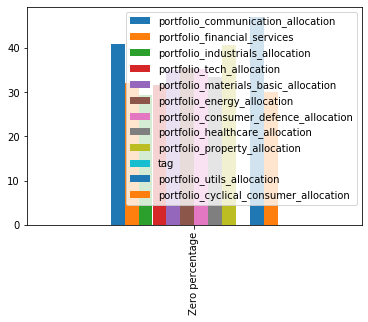

In [259]:
pd.DataFrame(D, index=['Zero percentage']).plot(kind='bar')

In [260]:
replace_zero_with_nan(df_fund_allocations)

portfolio_communication_allocation        10380
portfolio_financial_services               8153
portfolio_industrials_allocation           7482
portfolio_tech_allocation                  8015
portfolio_materials_basic_allocation       8867
portfolio_energy_allocation                9023
portfolio_consumer_defence_allocation      8947
portfolio_healthcare_allocation            8499
portfolio_property_allocation             10310
tag                                           0
portfolio_utils_allocation                11868
portfolio_cyclical_consumer_allocation     7611
dtype: int64


In [261]:
#replacing nan with median
check_missing_values(df_fund_allocations)

portfolio_communication_allocation        0
portfolio_financial_services              0
portfolio_industrials_allocation          0
portfolio_tech_allocation                 0
portfolio_materials_basic_allocation      0
portfolio_energy_allocation               0
portfolio_consumer_defence_allocation     0
portfolio_healthcare_allocation           0
portfolio_property_allocation             0
tag                                       0
portfolio_utils_allocation                0
portfolio_cyclical_consumer_allocation    0
dtype: int64


# fund_ratios

In [262]:
#Data for second csv
df_fund_ratios=pd.read_csv('fund_ratios.csv')
df_fund_ratios.head()

,fund_id,tag,fund_ratio_net_annual_expense,pb_ratio,ps_ratio,mmc,pc_ratio,pe_ratio
0,264614c6-5ac3-4146-ba26-1674b136cb40,67922,1.44,1.71,1.31,"19,857.41",5.91,14.51
1,f5ad58c2-fdea-4087-8678-e04744f89f90,134783,0.58,5.30,3.38,"72,347.03",15.95,18.88
2,3c13f4ab-02c4-4ca7-a133-7e996ec5d0c4,61271,0.99,5.40,3.67,"68,857.43",15.97,23.27
3,ff78bdd8-59eb-4cef-9f3c-b1baacce9554,64412,0.52,2.23,1.63,"43,266.62",8.93,12.7
4,63d8406d-c525-494a-8e03-d4fc4cfcb571,184058,0.75,2.02,1.4,"43,747.9",7.59,14.74


In [263]:
details_about_df(df_fund_ratios)

(25000, 8)
fund_id                           object
tag                                int64
fund_ratio_net_annual_expense    float64
pb_ratio                         float64
ps_ratio                          object
mmc                               object
pc_ratio                          object
pe_ratio                          object
dtype: object


In [264]:
#getting list of columns whose dtypes is 

df_fund_ratios["ps_ratio"] = df_fund_ratios["ps_ratio"].astype(str)
df_fund_ratios["mmc"] = df_fund_ratios["mmc"].astype(str)
df_fund_ratios["pc_ratio"] = df_fund_ratios["pc_ratio"].astype(str)
df_fund_ratios["pe_ratio"] = df_fund_ratios["pe_ratio"].astype(str)


In [265]:
###############
df_fund_ratios["ps_ratio"] = df_fund_ratios["ps_ratio"].apply(lambda x: float(x.split()[0].replace(',', '')))
df_fund_ratios["mmc"] = df_fund_ratios["mmc"].apply(lambda x: float(x.split()[0].replace(',', '')))
df_fund_ratios["pc_ratio"] = df_fund_ratios["pc_ratio"].apply(lambda x: float(x.split()[0].replace(',', '')))
df_fund_ratios["pe_ratio"] = df_fund_ratios["pe_ratio"].apply(lambda x: float(x.split()[0].replace(',', '')))


In [266]:
details_about_df(df_fund_ratios)

(25000, 8)
fund_id                           object
tag                                int64
fund_ratio_net_annual_expense    float64
pb_ratio                         float64
ps_ratio                         float64
mmc                              float64
pc_ratio                         float64
pe_ratio                         float64
dtype: object


In [267]:
D=percentage_zero(df_fund_ratios)
D

{'fund_id': 0.0,
 'tag': 0.0,
 'fund_ratio_net_annual_expense': 0.356,
 'pb_ratio': 24.236,
 'ps_ratio': 23.94,
 'mmc': 24.032,
 'pc_ratio': 24.176000000000002,
 'pe_ratio': 24.152}

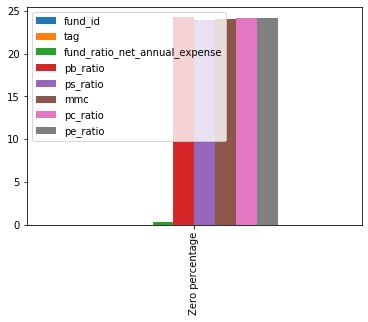

In [268]:
pd.DataFrame(D, index=['Zero percentage']).plot(kind='bar')

In [269]:
replace_zero_with_nan(df_fund_ratios)

fund_id                             0
tag                                 0
fund_ratio_net_annual_expense      89
pb_ratio                         6173
ps_ratio                         6099
mmc                              6122
pc_ratio                         6158
pe_ratio                         6152
dtype: int64


In [270]:
check_missing_values(df_fund_ratios)

fund_id                          0
tag                              0
fund_ratio_net_annual_expense    0
pb_ratio                         0
ps_ratio                         0
mmc                              0
pc_ratio                         0
pe_ratio                         0
dtype: int64


# fund_specs

In [271]:
#Data for second csv
df_fund_specs=pd.read_csv('fund_specs.csv')
df_fund_specs.head()

,investment_class,currency,total_assets,yield,greatstone_rating,inception_date,tag,fund_size,return_ytd
0,Value,USD,1.185000e+07,5.57,NaN,2015-02-02,67922,Large,20.19
1,Growth,USD,1.397000e+10,0.42,3.0,2012-05-30,134783,Large,16.79
2,Growth,USD,2.660000e+09,0.02,4.0,1987-08-23,61271,Large,17.13
3,Value,USD,1.957000e+10,2.71,3.0,2005-10-24,64412,Large,11.63
4,Blend,USD,2.847000e+07,2.44,0.0,2016-12-12,184058,Large,10.25


In [272]:
details_about_df(df_fund_specs)

(25000, 9)
investment_class      object
currency              object
total_assets         float64
yield                float64
greatstone_rating    float64
inception_date        object
tag                    int64
fund_size             object
return_ytd           float64
dtype: object


In [273]:
D=percentage_zero(df_fund_specs)
D

{'investment_class': 0.0,
 'currency': 0.0,
 'total_assets': 0.0,
 'yield': 16.536,
 'greatstone_rating': 5.46,
 'inception_date': 0.0,
 'tag': 0.0,
 'fund_size': 0.0,
 'return_ytd': 0.08}

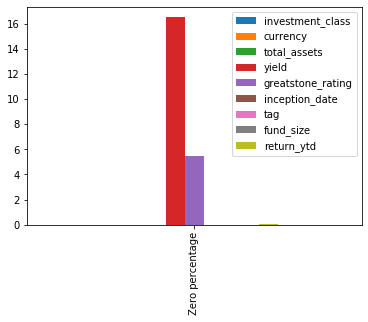

In [274]:
pd.DataFrame(D, index=['Zero percentage']).plot(kind='bar')

In [275]:
replace_zero_with_nan(df_fund_specs)

investment_class     1480
currency                0
total_assets          119
yield                4261
greatstone_rating    6365
inception_date          0
tag                     0
fund_size            1480
return_ytd            128
dtype: int64


In [276]:
check_missing_values(df_fund_specs)

investment_class     0
currency             0
total_assets         0
yield                0
greatstone_rating    0
inception_date       0
tag                  0
fund_size            0
return_ytd           0
dtype: int64


# Other specs

In [277]:
df_other_specs=pd.read_csv('other_specs.csv')
df_other_specs.head()

,2014_category_return,2012_return_category,years_up,2018_return_category,tag,category_return_1year,cash_percent_of_portfolio,pc_ratio,2011_return_category,ytd_return_fund,...,2018_return_fund,2017_return_fund,greatstone_rating,category_ratio_net_annual_expense,category_return_2015,1_month_fund_return,bond_percentage_of_porfolio,portfolio_preferred,2010_return_category,2013_category_return
0,NaN,NaN,1.0,-16.32,67922,13.05,1.19,5.91,NaN,20.19,...,-12.23,-3.31,NaN,1.75,-34.98,4.12,0.00,0.00,NaN,NaN
1,10.00,15.34,5.0,-2.09,134783,10.71,0.10,15.95,NaN,16.79,...,-2.62,26.39,3.0,1.06,3.60,2.33,0.00,0.00,NaN,33.92
2,10.00,15.34,26.0,-2.09,61271,10.71,2.00,15.97,-2.46,17.13,...,5.04,25.79,4.0,1.06,3.60,3.77,0.58,0.08,15.53,33.92
3,10.21,14.57,11.0,-8.53,64412,4.48,6.13,8.93,-0.75,11.63,...,-7.54,8.53,3.0,1.00,-4.05,1.46,0.00,0.00,13.66,31.21
4,NaN,NaN,1.0,-7.04,184058,3.17,6.59,7.59,NaN,10.25,...,-7.37,17.52,0.0,0.45,NaN,1.28,24.97,0.02,NaN,NaN


In [278]:
details_about_df(df_other_specs)

(25000, 43)
2014_category_return                 float64
2012_return_category                 float64
years_up                             float64
2018_return_category                 float64
tag                                    int64
category_return_1year                float64
cash_percent_of_portfolio            float64
pc_ratio                              object
2011_return_category                 float64
ytd_return_fund                      float64
years_down                           float64
2014_return_fund                     float64
category_return_1month               float64
2013_return_fund                     float64
fund_return_3months                  float64
ytd_return_category                  float64
pb_ratio                             float64
2017_category_return                 float64
1_year_return_fund                   float64
pe_ratio                              object
2015_return_fund                     float64
portfolio_convertable                float6

In [279]:
#getting list of columns whose dtypes is 

df_other_specs["ps_ratio"] = df_other_specs["ps_ratio"].astype(str)
df_other_specs["mmc"] = df_other_specs["mmc"].astype(str)
df_other_specs["pc_ratio"] = df_other_specs["pc_ratio"].astype(str)
df_other_specs["pe_ratio"] = df_other_specs["pe_ratio"].astype(str)


In [280]:
###############
df_other_specs["ps_ratio"] = df_other_specs["ps_ratio"].apply(lambda x: float(x.split()[0].replace(',', '')))
df_other_specs["mmc"] = df_other_specs["mmc"].apply(lambda x: float(x.split()[0].replace(',', '')))
df_other_specs["pc_ratio"] = df_other_specs["pc_ratio"].apply(lambda x: float(x.split()[0].replace(',', '')))
df_other_specs["pe_ratio"] = df_other_specs["pe_ratio"].apply(lambda x: float(x.split()[0].replace(',', '')))


In [281]:
replace_zero_with_nan(df_other_specs)

2014_category_return                  6183
2012_return_category                  9124
years_up                              1812
2018_return_category                   809
tag                                      0
category_return_1year                  303
cash_percent_of_portfolio             1367
pc_ratio                              6158
2011_return_category                 10533
ytd_return_fund                        139
years_down                            1641
2014_return_fund                      7213
category_return_1month                 303
2013_return_fund                      8547
fund_return_3months                    138
ytd_return_category                    303
pb_ratio                              6173
2017_category_return                  1428
1_year_return_fund                     146
pe_ratio                              6152
2015_return_fund                      5729
portfolio_convertable                17146
3_months_return_category               303
portfolio_o

In [282]:
check_missing_values(df_other_specs)

2014_category_return                 0
2012_return_category                 0
years_up                             0
2018_return_category                 0
tag                                  0
category_return_1year                0
cash_percent_of_portfolio            0
pc_ratio                             0
2011_return_category                 0
ytd_return_fund                      0
years_down                           0
2014_return_fund                     0
category_return_1month               0
2013_return_fund                     0
fund_return_3months                  0
ytd_return_category                  0
pb_ratio                             0
2017_category_return                 0
1_year_return_fund                   0
pe_ratio                             0
2015_return_fund                     0
portfolio_convertable                0
3_months_return_category             0
portfolio_others                     0
2016_return_fund                     0
mmc                      

# return_3year


In [283]:
df_return_3year=pd.read_csv('return_3year.csv')
df_return_3year.head()

,tag,3yrs_treynor_ratio_fund,3_years_alpha_fund,3years_category_std,3yrs_sharpe_ratio_fund,3yrs_treynor_ratio_category,3_years_return_mean_annual_fund,fund_beta_3years,3years_fund_r_squared,3years_fund_std,category_beta_3years,fund_return_3years,3_years_alpha_category,3_years_return_mean_annual_category,3yrs_sharpe_ratio_category,3years_category_r_squared,3_years_return_category
0,67922,2.46,-7.10,0.18,0.26,0.05,0.45,1.20,54.83,16.25,0.01,4.24,-0.04,0.01,0.00,0.42,7.36
1,134783,12.2,0.07,0.13,1.06,0.13,1.19,1.07,88.46,12.26,0.01,14.39,0.01,0.01,0.01,0.84,15.35
2,61271,17.88,4.32,0.13,1.46,0.13,1.32,0.85,84.41,9.93,0.01,16.42,0.01,0.01,0.01,0.84,15.35
3,64412,7.93,-2.73,0.11,0.68,0.09,0.58,0.70,81.02,8.36,0.01,6.85,-0.02,0.01,0.01,0.84,10.01
4,184058,NaN,NaN,0.08,NaN,0.06,NaN,NaN,NaN,NaN,0.01,0.00,-0.01,0.01,0.01,0.97,9.13


In [284]:
details_about_df(df_return_3year)

(25000, 17)
tag                                      int64
3yrs_treynor_ratio_fund                 object
3_years_alpha_fund                     float64
3years_category_std                    float64
3yrs_sharpe_ratio_fund                 float64
3yrs_treynor_ratio_category            float64
3_years_return_mean_annual_fund        float64
fund_beta_3years                       float64
3years_fund_r_squared                  float64
3years_fund_std                        float64
category_beta_3years                   float64
fund_return_3years                     float64
3_years_alpha_category                 float64
3_years_return_mean_annual_category    float64
3yrs_sharpe_ratio_category             float64
3years_category_r_squared              float64
3_years_return_category                float64
dtype: object


In [285]:
df_return_3year["3yrs_treynor_ratio_fund"] = df_return_3year["3yrs_treynor_ratio_fund"].astype(str)
df_return_3year["3yrs_treynor_ratio_fund"] = df_return_3year["3yrs_treynor_ratio_fund"].apply(lambda x: float(x.split()[0].replace(',', '')))

In [286]:
details_about_df(df_return_3year)

(25000, 17)
tag                                      int64
3yrs_treynor_ratio_fund                float64
3_years_alpha_fund                     float64
3years_category_std                    float64
3yrs_sharpe_ratio_fund                 float64
3yrs_treynor_ratio_category            float64
3_years_return_mean_annual_fund        float64
fund_beta_3years                       float64
3years_fund_r_squared                  float64
3years_fund_std                        float64
category_beta_3years                   float64
fund_return_3years                     float64
3_years_alpha_category                 float64
3_years_return_mean_annual_category    float64
3yrs_sharpe_ratio_category             float64
3years_category_r_squared              float64
3_years_return_category                float64
dtype: object


In [287]:
replace_zero_with_nan(df_return_3year)

tag                                       0
3yrs_treynor_ratio_fund                1663
3_years_alpha_fund                     1700
3years_category_std                     458
3yrs_sharpe_ratio_fund                 1698
3yrs_treynor_ratio_category            1174
3_years_return_mean_annual_fund        1669
fund_beta_3years                       1681
3years_fund_r_squared                  1660
3years_fund_std                        1648
category_beta_3years                   3306
fund_return_3years                     1655
3_years_alpha_category                 5500
3_years_return_mean_annual_category    8800
3yrs_sharpe_ratio_category             6895
3years_category_r_squared               293
3_years_return_category                 303
dtype: int64


In [288]:
check_missing_values(df_return_3year)

tag                                    0
3yrs_treynor_ratio_fund                0
3_years_alpha_fund                     0
3years_category_std                    0
3yrs_sharpe_ratio_fund                 0
3yrs_treynor_ratio_category            0
3_years_return_mean_annual_fund        0
fund_beta_3years                       0
3years_fund_r_squared                  0
3years_fund_std                        0
category_beta_3years                   0
fund_return_3years                     0
3_years_alpha_category                 0
3_years_return_mean_annual_category    0
3yrs_sharpe_ratio_category             0
3years_category_r_squared              0
3_years_return_category                0
dtype: int64


# return_5year

In [289]:
df_return_5year=pd.read_csv('return_5year.csv')
df_return_5year.head()

,category_r_squared_5years,5yrs_sharpe_ratio_fund,5_years_alpha_fund,5years_fund_r_squared,5years_fund_std,5yrs_sharpe_ratio_category,5_years_beta_fund,5yrs_treynor_ratio_fund,5_years_return_mean_annual_fund,5_years_return_mean_annual_category,5yrs_treynor_ratio_category,5_years_return_fund,5_years_alpha_category,5_years_beta_category,5years_category_std,tag,5_years_return_category
0,0.51,NaN,NaN,NaN,NaN,-0.00,NaN,NaN,NaN,-0.00,-0.04,0.00,-0.11,0.01,0.20,67922,-4.25
1,0.86,0.89,0.34,90.11,12.40,0.01,1.05,10.37,0.99,0.01,0.10,11.71,-0.00,0.01,0.13,134783,11.26
2,0.86,1.15,2.96,89.02,10.28,0.01,0.86,13.84,1.05,0.01,0.10,12.78,-0.00,0.01,0.13,61271,11.26
3,0.86,0.77,-0.50,82.36,8.53,0.01,0.69,9.3,0.62,0.01,0.07,7.25,-0.03,0.01,0.11,64412,7.20
4,0.96,NaN,NaN,NaN,NaN,0.01,NaN,NaN,NaN,0.01,0.04,0.00,-0.01,0.01,0.09,184058,5.95


In [290]:
details_about_df(df_return_5year)

(25000, 17)
category_r_squared_5years              float64
5yrs_sharpe_ratio_fund                 float64
5_years_alpha_fund                     float64
5years_fund_r_squared                  float64
5years_fund_std                        float64
5yrs_sharpe_ratio_category             float64
5_years_beta_fund                      float64
5yrs_treynor_ratio_fund                 object
5_years_return_mean_annual_fund        float64
5_years_return_mean_annual_category    float64
5yrs_treynor_ratio_category            float64
5_years_return_fund                    float64
5_years_alpha_category                 float64
5_years_beta_category                  float64
5years_category_std                    float64
tag                                      int64
5_years_return_category                float64
dtype: object


In [291]:
df_return_5year["5yrs_treynor_ratio_fund"] = df_return_5year["5yrs_treynor_ratio_fund"].astype(str)
df_return_5year["5yrs_treynor_ratio_fund"] = df_return_5year["5yrs_treynor_ratio_fund"].apply(lambda x: float(x.split()[0].replace(',', '')))

In [292]:
replace_zero_with_nan(df_return_5year)

category_r_squared_5years                321
5yrs_sharpe_ratio_fund                  3924
5_years_alpha_fund                      3893
5years_fund_r_squared                   3862
5years_fund_std                         3843
5yrs_sharpe_ratio_category              9808
5_years_beta_fund                       3874
5yrs_treynor_ratio_fund                 3853
5_years_return_mean_annual_fund         3880
5_years_return_mean_annual_category    14828
5yrs_treynor_ratio_category             1231
5_years_return_fund                     3848
5_years_alpha_category                  7606
5_years_beta_category                   3709
5years_category_std                      293
tag                                        0
5_years_return_category                  303
dtype: int64


In [293]:
check_missing_values(df_return_5year)

category_r_squared_5years              0
5yrs_sharpe_ratio_fund                 0
5_years_alpha_fund                     0
5years_fund_r_squared                  0
5years_fund_std                        0
5yrs_sharpe_ratio_category             0
5_years_beta_fund                      0
5yrs_treynor_ratio_fund                0
5_years_return_mean_annual_fund        0
5_years_return_mean_annual_category    0
5yrs_treynor_ratio_category            0
5_years_return_fund                    0
5_years_alpha_category                 0
5_years_beta_category                  0
5years_category_std                    0
tag                                    0
5_years_return_category                0
dtype: int64


# return_10year

In [294]:
df_return_10year=pd.read_csv('return_10year.csv')
df_return_10year.head()

,10years_category_r_squared,10yrs_sharpe_ratio_fund,10_years_alpha_fund,10years_fund_r_squared,10years_fund_std,10yrs_sharpe_ratio_category,10_years_beta_fund,10yrs_treynor_ratio_fund,fund_id,10_years_return_mean_annual_category,10yrs_treynor_ratio_category,10_years_return_fund,10_years_alpha_category,10_years_beta_category,10years_category_std,10_years_return_mean_annual_fund,10_years_return_category
0,0.49,NaN,NaN,NaN,NaN,0.01,NaN,NaN,264614c6-5ac3-4146-ba26-1674b136cb40,0.01,0.21,0.00,0.06,0.01,0.13,NaN,14.30
1,0.88,1.16,0.16,91.68,14.30,0.01,1.08,15.57,f5ad58c2-fdea-4087-8678-e04744f89f90,0.01,0.15,17.25,-0.01,0.01,0.14,1.42,15.94
2,0.88,1.22,1.00,90.69,12.68,0.01,0.95,16.58,3c13f4ab-02c4-4ca7-a133-7e996ec5d0c4,0.01,0.15,16.21,-0.01,0.01,0.14,1.33,15.94
3,0.90,1.20,0.75,89.03,11.21,0.01,0.84,16.38,ff78bdd8-59eb-4cef-9f3c-b1baacce9554,0.01,0.14,14.12,-0.02,0.01,0.13,1.16,13.68
4,0.97,NaN,NaN,NaN,NaN,0.01,NaN,NaN,63d8406d-c525-494a-8e03-d4fc4cfcb571,0.01,0.08,0.00,-0.02,0.01,0.12,NaN,11.53


In [295]:
details_about_df(df_return_10year)

(25000, 17)
10years_category_r_squared              float64
10yrs_sharpe_ratio_fund                 float64
10_years_alpha_fund                     float64
10years_fund_r_squared                  float64
10years_fund_std                        float64
10yrs_sharpe_ratio_category             float64
10_years_beta_fund                      float64
10yrs_treynor_ratio_fund                 object
fund_id                                  object
10_years_return_mean_annual_category    float64
10yrs_treynor_ratio_category            float64
10_years_return_fund                    float64
10_years_alpha_category                 float64
10_years_beta_category                  float64
10years_category_std                    float64
10_years_return_mean_annual_fund        float64
10_years_return_category                float64
dtype: object


In [296]:
df_return_10year["10yrs_treynor_ratio_fund"] = df_return_10year["10yrs_treynor_ratio_fund"].astype(str)
df_return_10year["10yrs_treynor_ratio_fund"] = df_return_10year["10yrs_treynor_ratio_fund"].apply(lambda x: float(x.split()[0].replace(',', '')))

In [297]:
replace_zero_with_nan(df_return_10year)

10years_category_r_squared               722
10yrs_sharpe_ratio_fund                 8588
10_years_alpha_fund                     8620
10years_fund_r_squared                  8615
10years_fund_std                        8584
10yrs_sharpe_ratio_category             1218
10_years_beta_fund                      8606
10yrs_treynor_ratio_fund                8586
fund_id                                    0
10_years_return_mean_annual_category    5880
10yrs_treynor_ratio_category             520
10_years_return_fund                    8590
10_years_alpha_category                 5006
10_years_beta_category                  3235
10years_category_std                     492
10_years_return_mean_annual_fund        8589
10_years_return_category                 502
dtype: int64


In [298]:
check_missing_values(df_return_10year)

10years_category_r_squared              0
10yrs_sharpe_ratio_fund                 0
10_years_alpha_fund                     0
10years_fund_r_squared                  0
10years_fund_std                        0
10yrs_sharpe_ratio_category             0
10_years_beta_fund                      0
10yrs_treynor_ratio_fund                0
fund_id                                 0
10_years_return_mean_annual_category    0
10yrs_treynor_ratio_category            0
10_years_return_fund                    0
10_years_alpha_category                 0
10_years_beta_category                  0
10years_category_std                    0
10_years_return_mean_annual_fund        0
10_years_return_category                0
dtype: int64


# Fund Config

In [299]:
df_fund_config=pd.read_csv('fund_config.csv')
df_fund_config.head()

,category,parent_company,fund_id,fund_name
0,Energy Limited Partnership,DWS,264614c6-5ac3-4146-ba26-1674b136cb40,DWS RREEF MLP & Energy Infrastructure Fund - C...
1,Large Growth,Janus Henderson,f5ad58c2-fdea-4087-8678-e04744f89f90,Janus Henderson Research Fund Class N
2,Large Growth,Calvert Research and Management,3c13f4ab-02c4-4ca7-a133-7e996ec5d0c4,Calvert Equity Fund Class A
3,Large Value,Invesco,ff78bdd8-59eb-4cef-9f3c-b1baacce9554,Invesco Diversified Dividend Fund R5 Class
4,Target-Date 2035,PGIM Funds (Prudential),63d8406d-c525-494a-8e03-d4fc4cfcb571,Prudential Day One 2035 Fund Class R3


In [300]:
print (len(df_fund_config.category.unique()))

111


In [301]:
df_fund_config['category']=df_fund_config['category'].astype('category')
df_fund_config = pd.get_dummies(df_fund_config, columns=['category'])
df_fund_config.head(2)

,parent_company,fund_id,fund_name,category_Allocation - 15% to 30% Equity,category_Allocation - 30% to 50% Equity,category_Allocation - 50% to 70% Equity,category_Allocation - 70% to 85% Equity,category_Allocation - 85%+ Equity,category_Bank Loan,category_Bear Market,...,category_Trading - Leveraged Debt,category_Trading - Leveraged Equity,category_Trading - Miscellaneous,category_Ultrashort Bond,category_Utilities,category_Volatility,category_World Allocation,category_World Bond,category_World Large Stock,category_World Small/Mid Stock
0,DWS,264614c6-5ac3-4146-ba26-1674b136cb40,DWS RREEF MLP & Energy Infrastructure Fund - C...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Janus Henderson,f5ad58c2-fdea-4087-8678-e04744f89f90,Janus Henderson Research Fund Class N,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [302]:
df_fund_config.dtypes

parent_company                             object
fund_id                                    object
fund_name                                  object
category_Allocation - 15% to 30% Equity     uint8
category_Allocation - 30% to 50% Equity     uint8
                                            ...  
category_Volatility                         uint8
category_World Allocation                   uint8
category_World Bond                         uint8
category_World Large Stock                  uint8
category_World Small/Mid Stock              uint8
Length: 114, dtype: object

In [303]:
details_about_df(df_fund_config)

(25000, 114)
parent_company                             object
fund_id                                    object
fund_name                                  object
category_Allocation - 15% to 30% Equity     uint8
category_Allocation - 30% to 50% Equity     uint8
                                            ...  
category_Volatility                         uint8
category_World Allocation                   uint8
category_World Bond                         uint8
category_World Large Stock                  uint8
category_World Small/Mid Stock              uint8
Length: 114, dtype: object


In [304]:
replace_zero_with_nan(df_fund_config)

parent_company                                 0
fund_id                                        0
fund_name                                      0
category_Allocation - 15% to 30% Equity    24804
category_Allocation - 30% to 50% Equity    24482
                                           ...  
category_Volatility                        24993
category_World Allocation                  24553
category_World Bond                        24712
category_World Large Stock                 24145
category_World Small/Mid Stock             24861
Length: 114, dtype: int64


In [305]:
df_fundid_final=pd.merge(df_fund_config,df_return_10year,on=["fund_id"],how="inner")
df_fundid_final

,parent_company,fund_id,fund_name,category_Allocation - 15% to 30% Equity,category_Allocation - 30% to 50% Equity,category_Allocation - 50% to 70% Equity,category_Allocation - 70% to 85% Equity,category_Allocation - 85%+ Equity,category_Bank Loan,category_Bear Market,...,10_years_beta_fund,10yrs_treynor_ratio_fund,10_years_return_mean_annual_category,10yrs_treynor_ratio_category,10_years_return_fund,10_years_alpha_category,10_years_beta_category,10years_category_std,10_years_return_mean_annual_fund,10_years_return_category
0,DWS,264614c6-5ac3-4146-ba26-1674b136cb40,DWS RREEF MLP & Energy Infrastructure Fund - C...,0,0,0,0,0,0,0,...,1.01,10.29,0.01,0.21,0.00,0.06,0.01,0.13,0.90,14.30
1,Janus Henderson,f5ad58c2-fdea-4087-8678-e04744f89f90,Janus Henderson Research Fund Class N,0,0,0,0,0,0,0,...,1.08,15.57,0.01,0.15,17.25,-0.01,0.01,0.14,1.42,15.94
2,Calvert Research and Management,3c13f4ab-02c4-4ca7-a133-7e996ec5d0c4,Calvert Equity Fund Class A,0,0,0,0,0,0,0,...,0.95,16.58,0.01,0.15,16.21,-0.01,0.01,0.14,1.33,15.94
3,Invesco,ff78bdd8-59eb-4cef-9f3c-b1baacce9554,Invesco Diversified Dividend Fund R5 Class,0,0,0,0,0,0,0,...,0.84,16.38,0.01,0.14,14.12,-0.02,0.01,0.13,1.16,13.68
4,PGIM Funds (Prudential),63d8406d-c525-494a-8e03-d4fc4cfcb571,Prudential Day One 2035 Fund Class R3,0,0,0,0,0,0,0,...,1.01,10.29,0.01,0.08,0.00,-0.02,0.01,0.12,0.90,11.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,Federated,c3d73c76-6b0c-4ee4-b562-e9bff53e4c8c,"Federated Equity Income Fund, Inc. Class A Shares",0,0,0,0,0,0,0,...,0.92,11.70,0.01,0.14,11.16,-0.02,0.01,0.13,0.95,13.68
24996,AllianceBernstein,12fc8949-6563-4dd4-a7cc-0400131fa6ab,AB Tax-Managed Wealth Appreciation Strategy Cl...,0,0,0,0,0,0,0,...,0.82,12.87,0.01,0.14,10.99,0.04,0.01,0.14,0.95,11.79
24997,OppenheimerFunds,7fe4b63a-c42e-4c2b-a59b-d29ade57ecfd,Oppenheimer Global Multi-Asset Income Fund Cla...,0,1,0,0,0,0,0,...,1.01,10.29,0.01,0.10,0.00,0.00,0.01,0.07,0.90,7.87
24998,Miller Value Funds,65421547-1407-4c50-92dc-e1cb1e9972dd,Miller Opportunity Trust Class I,0,0,0,0,0,0,0,...,1.67,10.86,0.01,0.13,18.64,-0.03,0.01,0.15,1.69,14.51


# Combining all the Dataframes with tag column

In [306]:
df_tag_id=pd.concat([df_bond_ratings,df_fund_allocations,df_fund_ratios,df_fund_specs,df_other_specs,df_return_3year,df_return_5year], axis=1, sort=False)
frames=[df_bond_ratings,df_fund_allocations,df_fund_ratios,df_fund_specs,df_other_specs,df_return_3year,df_return_5year]
df_tag_id.shape

(25000, 117)

In [307]:
print (df_bond_ratings.shape)
print (df_fund_allocations.shape)
#pd.merge(df_bond_ratings,df_fund_allocations,df_fund_ratios,df_fund_specs,df_other_specs,df_return_3year,df_return_5year, on=['tag'], how='inner')

(25000, 11)
(25000, 12)


In [308]:
cols_to_use = df_fund_allocations.columns.difference(df_bond_ratings.columns)
df_fund_allocations[cols_to_use]

,portfolio_communication_allocation,portfolio_consumer_defence_allocation,portfolio_cyclical_consumer_allocation,portfolio_energy_allocation,portfolio_financial_services,portfolio_healthcare_allocation,portfolio_industrials_allocation,portfolio_materials_basic_allocation,portfolio_property_allocation,portfolio_tech_allocation,portfolio_utils_allocation
0,0.00,0.00,0.00,100.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.78,5.88,17.38,0.38,9.77,14.41,9.97,2.86,2.67,35.51,0.39
2,4.70,9.42,7.09,0.00,16.40,16.47,11.45,8.36,1.03,25.09,0.00
3,6.53,25.73,5.43,6.79,13.80,9.00,10.91,2.22,0.00,0.16,19.42
4,3.49,7.29,10.95,5.11,13.95,12.22,10.51,3.75,10.41,19.26,3.07
...,...,...,...,...,...,...,...,...,...,...,...
24995,6.53,7.12,8.96,9.73,21.00,13.92,7.42,3.00,4.59,10.67,7.06
24996,3.70,8.83,11.90,5.80,18.83,10.97,10.10,3.40,4.75,19.32,2.40
24997,1.17,2.49,6.56,8.91,8.71,4.84,14.03,5.52,28.24,6.89,12.64
24998,2.21,3.27,22.12,0.00,19.92,25.31,12.55,0.00,0.00,14.62,0.00


In [309]:
df_bond_merge_fund = pd.merge(df_bond_ratings, df_fund_allocations[cols_to_use], left_index=True, right_index=True, how='outer')
df_bond_merge_fund.head()

,bb_rating,below_b_rating,others_rating,maturity_bond,b_rating,tag,a_rating,aaa_rating,aa_rating,bbb_rating,...,portfolio_consumer_defence_allocation,portfolio_cyclical_consumer_allocation,portfolio_energy_allocation,portfolio_financial_services,portfolio_healthcare_allocation,portfolio_industrials_allocation,portfolio_materials_basic_allocation,portfolio_property_allocation,portfolio_tech_allocation,portfolio_utils_allocation
0,0.0,0.0,0.0,7.29,0.0,67922,0.0,0.0,0.0,0.0,...,0.00,0.00,100.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.0,0.0,0.0,7.29,0.0,134783,0.0,0.0,0.0,0.0,...,5.88,17.38,0.38,9.77,14.41,9.97,2.86,2.67,35.51,0.39
2,0.0,0.0,0.0,7.29,0.0,61271,0.0,0.0,0.0,0.0,...,9.42,7.09,0.00,16.40,16.47,11.45,8.36,1.03,25.09,0.00
3,0.0,0.0,0.0,7.29,0.0,64412,0.0,0.0,0.0,0.0,...,25.73,5.43,6.79,13.80,9.00,10.91,2.22,0.00,0.16,19.42
4,0.0,0.0,0.0,7.29,0.0,184058,0.0,0.0,0.0,0.0,...,7.29,10.95,5.11,13.95,12.22,10.51,3.75,10.41,19.26,3.07


In [310]:
print (df_bond_merge_fund.shape)
print (df_fund_ratios.shape)
cols_to_use = df_fund_ratios.columns.difference(df_bond_merge_fund.columns)
df_fund_ratios[cols_to_use]
df_bond_merge_fund_ratio = pd.merge(df_bond_merge_fund, df_fund_ratios[cols_to_use], left_index=True, right_index=True, how='outer')
df_bond_merge_fund_ratio.head()
print (df_bond_merge_fund_ratio.shape)

(25000, 22)
(25000, 8)
(25000, 29)


In [311]:
print (df_fund_specs.shape)
print (df_other_specs.shape)
cols_to_use = df_fund_specs.columns.difference(df_other_specs.columns)
df_fund_specs[cols_to_use]
df_bond_merge_spcs= pd.merge(df_other_specs, df_fund_specs[cols_to_use], left_index=True, right_index=True, how='outer')
df_bond_merge_spcs.head()
print (df_bond_merge_spcs.shape)

(25000, 9)
(25000, 43)
(25000, 50)


In [312]:
print (df_bond_merge_spcs.shape)
print (df_bond_merge_fund_ratio.shape)
cols_to_use = df_bond_merge_spcs.columns.difference(df_bond_merge_fund_ratio.columns)
df_bond_merge_spcs[cols_to_use]
df_pre= pd.merge(df_bond_merge_fund_ratio, df_bond_merge_spcs[cols_to_use], left_index=True, right_index=True, how='outer')
df_pre.head()
print (df_pre.shape)

(25000, 50)
(25000, 29)
(25000, 73)


In [313]:
print (df_return_3year.shape)
print (df_return_5year.shape)
cols_to_use = df_return_3year.columns.difference(df_return_5year.columns)
df_return_3year[cols_to_use]
df_return= pd.merge(df_return_5year, df_return_3year[cols_to_use], left_index=True, right_index=True, how='outer')
df_return.head()
print (df_return.shape)

(25000, 17)
(25000, 17)
(25000, 33)


In [314]:
print (df_return.shape)
print (df_pre.shape)
cols_to_use = df_return.columns.difference(df_pre.columns)
df_return[cols_to_use]
df_tag_final= pd.merge(df_pre, df_return[cols_to_use], left_index=True, right_index=True, how='outer')
df_tag_final.head()
print (df_tag_final.shape)

(25000, 33)
(25000, 73)
(25000, 104)


In [315]:
print (df_fundid_final.shape)
print (df_tag_final.shape)
cols_to_use = df_fundid_final.columns.difference(df_tag_final.columns)
df_fundid_final[cols_to_use]
df_model_input= pd.merge(df_tag_final, df_fundid_final[cols_to_use], left_index=True, right_index=True, how='outer')
df_model_input.head()
print (df_model_input.shape)

(25000, 130)
(25000, 104)
(25000, 233)


# Final Merged data

In [316]:
print (df_model_input.shape)
print (df_model_input.dtypes)

(25000, 233)
bb_rating                         float64
below_b_rating                    float64
others_rating                     float64
maturity_bond                     float64
b_rating                          float64
                                   ...   
category_World Bond                 uint8
category_World Large Stock          uint8
category_World Small/Mid Stock      uint8
fund_name                          object
parent_company                     object
Length: 233, dtype: object


In [317]:
df_model_input.head()

,bb_rating,below_b_rating,others_rating,maturity_bond,b_rating,tag,a_rating,aaa_rating,aa_rating,bbb_rating,...,category_Trading - Miscellaneous,category_Ultrashort Bond,category_Utilities,category_Volatility,category_World Allocation,category_World Bond,category_World Large Stock,category_World Small/Mid Stock,fund_name,parent_company
0,0.0,0.0,0.0,7.29,0.0,67922,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,DWS RREEF MLP & Energy Infrastructure Fund - C...,DWS
1,0.0,0.0,0.0,7.29,0.0,134783,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,Janus Henderson Research Fund Class N,Janus Henderson
2,0.0,0.0,0.0,7.29,0.0,61271,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,Calvert Equity Fund Class A,Calvert Research and Management
3,0.0,0.0,0.0,7.29,0.0,64412,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,Invesco Diversified Dividend Fund R5 Class,Invesco
4,0.0,0.0,0.0,7.29,0.0,184058,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,Prudential Day One 2035 Fund Class R3,PGIM Funds (Prudential)


In [318]:
df_model_input.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
bb_rating,25000.0,3.457963,8.284109,0.00,0.00,0.00,2.42,80.47
below_b_rating,25000.0,0.823751,2.694432,-0.02,0.00,0.00,0.10,42.30
others_rating,25000.0,1.659168,6.870359,-68.21,0.00,0.00,0.32,100.00
maturity_bond,25000.0,7.443911,2.370742,0.00,7.29,7.29,7.29,29.30
b_rating,25000.0,3.219650,9.178757,-0.12,0.00,0.00,0.70,80.68
...,...,...,...,...,...,...,...,...
category_Volatility,25000.0,0.000280,0.016731,0.00,0.00,0.00,0.00,1.00
category_World Allocation,25000.0,0.017880,0.132518,0.00,0.00,0.00,0.00,1.00
category_World Bond,25000.0,0.011520,0.106713,0.00,0.00,0.00,0.00,1.00
category_World Large Stock,25000.0,0.034200,0.181746,0.00,0.00,0.00,0.00,1.00


In [327]:
df_model_input.dtypes
test_numeric=df_model_input._get_numeric_data()
test_numeric.columns

Index(['bb_rating', 'below_b_rating', 'others_rating', 'maturity_bond',
       'b_rating', 'tag', 'a_rating', 'aaa_rating', 'aa_rating', 'bbb_rating',
       ...
       'category_Trading - Leveraged Debt',
       'category_Trading - Leveraged Equity',
       'category_Trading - Miscellaneous', 'category_Ultrashort Bond',
       'category_Utilities', 'category_Volatility',
       'category_World Allocation', 'category_World Bond',
       'category_World Large Stock', 'category_World Small/Mid Stock'],
      dtype='object', length=226)

In [328]:
import scipy
scipy.stats.skew(df_model_input)
df_skew_data=pd.DataFrame(columns=test_numeric.columns,data=[scipy.stats.skew(test_numeric)])
df_skew_data

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [360]:
#Function to count outliers for each column
def counting_outliers(df):
    outlier_count=[]
    for item in df:
        q1,q3=df[item].quantile([.25]).iloc[0],df[item].quantile([.75]).iloc[0]
        IQR=q3-q1
        utv,ltv=q3+1.5*IQR,q1-1.5*IQR
        #print ('uthv--->'+str(utv))
        #print ('ltv---->'+str(ltv))
        outlier=[x for x in df[item] if x<ltv or x>utv]
        #print (outlier)
        outlier_count.append(len(outlier))
        print ('number of outliers for-->'+str(item)+'-->is:'+str(len(outlier)))
    return outlier_count

In [361]:
a=counting_outliers(test_numeric)
df_outlier_count=pd.DataFrame(columns=test_numeric.columns,data=[a])
df_outlier_count

number of outliers for-->bb_rating-->is:4166
number of outliers for-->below_b_rating-->is:5705
number of outliers for-->others_rating-->is:5766
number of outliers for-->maturity_bond-->is:8075
number of outliers for-->b_rating-->is:5406
number of outliers for-->tag-->is:0
number of outliers for-->a_rating-->is:1908
number of outliers for-->aaa_rating-->is:3944
number of outliers for-->aa_rating-->is:3100
number of outliers for-->bbb_rating-->is:1113
number of outliers for-->duration_bond-->is:9836
number of outliers for-->portfolio_communication_allocation-->is:771
number of outliers for-->portfolio_consumer_defence_allocation-->is:379
number of outliers for-->portfolio_cyclical_consumer_allocation-->is:282
number of outliers for-->portfolio_energy_allocation-->is:1078
number of outliers for-->portfolio_financial_services-->is:263
number of outliers for-->portfolio_healthcare_allocation-->is:212
number of outliers for-->portfolio_industrials_allocation-->is:430
number of outliers for--

number of outliers for-->category_Inflation-Protected Bond-->is:217
number of outliers for-->category_Infrastructure-->is:88
number of outliers for-->category_Intermediate Government-->is:227
number of outliers for-->category_Intermediate-Term Bond-->is:960
number of outliers for-->category_Japan Stock-->is:30
number of outliers for-->category_Large Blend-->is:1282
number of outliers for-->category_Large Growth-->is:1335
number of outliers for-->category_Large Value-->is:1126
number of outliers for-->category_Latin America Stock-->is:15
number of outliers for-->category_Long Government-->is:26
number of outliers for-->category_Long-Short Credit-->is:52
number of outliers for-->category_Long-Short Equity-->is:248
number of outliers for-->category_Long-Term Bond-->is:20
number of outliers for-->category_Managed Futures-->is:116
number of outliers for-->category_Market Neutral-->is:144
number of outliers for-->category_Mid-Cap Blend-->is:405
number of outliers for-->category_Mid-Cap Growt

,bb_rating,below_b_rating,others_rating,maturity_bond,b_rating,tag,a_rating,aaa_rating,aa_rating,bbb_rating,...,category_Trading - Leveraged Debt,category_Trading - Leveraged Equity,category_Trading - Miscellaneous,category_Ultrashort Bond,category_Utilities,category_Volatility,category_World Allocation,category_World Bond,category_World Large Stock,category_World Small/Mid Stock
0,4166,5705,5766,8075,5406,0,1908,3944,3100,1113,...,9,96,8,165,50,7,447,288,855,139


In [362]:
df_outlier_count=df_outlier_count.apply(lambda x:x/25000*100)
df_outlier_count

,bb_rating,below_b_rating,others_rating,maturity_bond,b_rating,tag,a_rating,aaa_rating,aa_rating,bbb_rating,...,category_Trading - Leveraged Debt,category_Trading - Leveraged Equity,category_Trading - Miscellaneous,category_Ultrashort Bond,category_Utilities,category_Volatility,category_World Allocation,category_World Bond,category_World Large Stock,category_World Small/Mid Stock
0,16.664,22.82,23.064,32.3,21.624,0.0,7.632,15.776,12.4,4.452,...,0.036,0.384,0.032,0.66,0.2,0.028,1.788,1.152,3.42,0.556


In [389]:
dict_outlier=df_outlier_count.to_dict()
print (type(dict_outlier))
from collections import Counter
from heapq import nlargest 
for k,v in dict_outlier.items():
    if v>20:
        print (k,v)

<class 'dict'>


TypeError: '>' not supported between instances of 'dict' and 'int'

In [370]:
df_outlier_count.describe().transpose().iloc[:,]>15

,count,mean,std,min,25%,50%,75%,max
bb_rating,False,True,False,True,True,True,True,True
below_b_rating,False,True,False,True,True,True,True,True
others_rating,False,True,False,True,True,True,True,True
maturity_bond,False,True,False,True,True,True,True,True
b_rating,False,True,False,True,True,True,True,True
...,...,...,...,...,...,...,...,...
category_Volatility,False,False,False,False,False,False,False,False
category_World Allocation,False,False,False,False,False,False,False,False
category_World Bond,False,False,False,False,False,False,False,False
category_World Large Stock,False,False,False,False,False,False,False,False
